In [5]:
import sys 
sys.path.append("..") 
import os

import numpy as np
from braiding_model import BraidOperator, show_braid_words
from braiding_model import GeneratorBraid, obtain_model_braid, obtain_model_torus_knot
from braiding_model import sigma_z, sigma_x, sigma_y, sigma_0
from braiding_model import NonHermitianHamiltonianBraid, BraidOperator, HamiltonianEffective
from braiding_model import PerturbationModel

from machine_learning import Classifier, Cluster
from topology import topology_comparator, similarity_function
from functools import partial

import matplotlib.pyplot as plt
import itertools

p1 = PerturbationModel()
p1.set_parameters(t1=0.1,t2=0.0)

p2 = PerturbationModel()
p2.set_parameters(t1=-0.1,t2=0.0)

p3 = PerturbationModel()
p3.set_parameters(t1=0.1,t2=0.1)

p4 = PerturbationModel()
p4.set_parameters(t1=0.0,t2=-0.1)

perturbations = [p1,p2,p3,p4]

np.seterr(all="ignore") # ignore some numerical errors

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [6]:
n_band = 3
braid_operator_list = [
    BraidOperator(1), BraidOperator(2),
    BraidOperator(-1)
]
model0 = obtain_model_braid(n_band=n_band, braid_operators=braid_operator_list)

show_braid_words(model0.get_braid_words())

#model0.save_band('./figs/Artin/model0_band.txt')

$\sigma^{-1}_1$ $\sigma_2$ $\sigma_1$ 

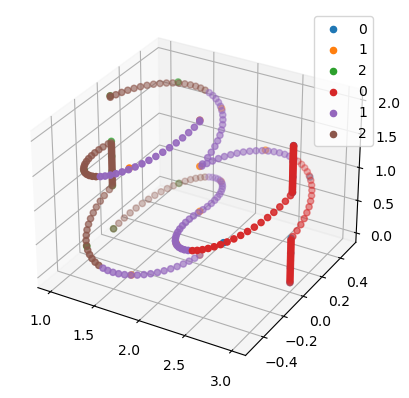

In [7]:
n_band = 3
braid_operators = [BraidOperator(1), BraidOperator(-2), BraidOperator(-1)]
hamiltonian_effective = HamiltonianEffective(n_band=n_band, braid_operators=braid_operators)

ax = plt.figure().add_subplot(projection='3d')
ks = np.linspace(0, 2 * np.pi, 10)
Es = np.array([hamiltonian_effective.get_energies(k) for k in ks])
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    ax.scatter(x, y, ks/(np.pi), label='{0}'.format(index))
    ax.legend()

ks = np.linspace(0, 2 * np.pi, 100)
Es = np.array([hamiltonian_effective.get_energies_Fourier(k) for k in ks])
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    ax.scatter(x, y, ks/(np.pi), label='{0}'.format(index))
    ax.legend()

plt.show()

hamiltonian_effective.save_band_coefficients('fig3', '1_-2_-1')